**Immigration to Canada from 1980 to 2013**

<img src="https://www.america-retail.com/static//2018/06/canada-1.jpg" width="800px">

**Importing some Libraries**

In [1]:
# for some basic operatios
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# for providing path
import os
print(os.listdir("../input"))


['Canada.xlsx']


**Reading the Data set**

In [2]:
# there are three sheets in this dataset
# the first sheet is Regions by Citizenship, 
# the second sheet is Canada by Citizenship, and 
# the third sheet is Canada by Citizenship2

# In this Study we will focus on Canada by Citizenship, 
# we have skip first 20 rows as it contains some poster of an organization 
# and also the last row as it contains total.

data = pd.read_excel('../input/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows = range(20),
                     skipfooter = 2)

# getting the shape of the data
data.shape

(195, 43)

In [3]:
# checking the head of the data

data.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
# let's check the columns in the data set

data.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

## Data Visualization

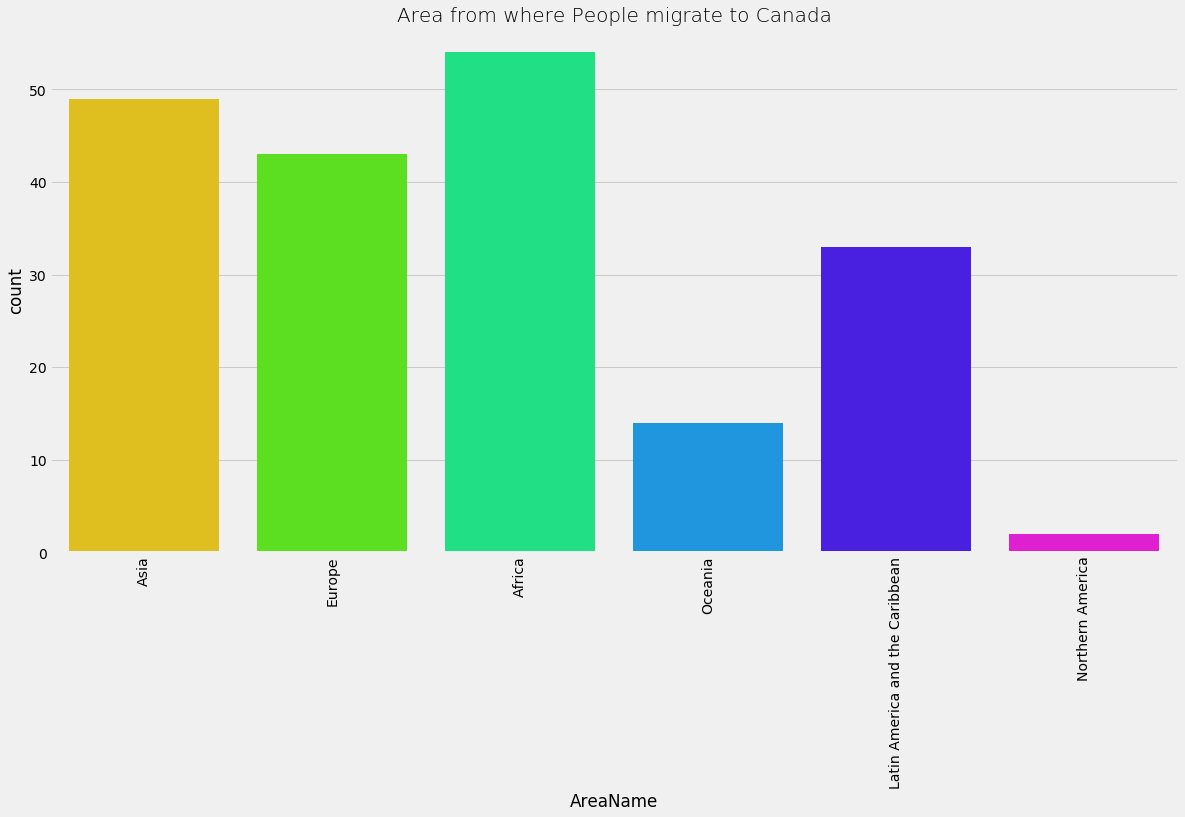

In [5]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['AreaName'], palette = 'hsv')
plt.title('Area from where People migrate to Canada', fontsize = 20, fontweight = 100)
plt.xticks(rotation = 90)
plt.show()

**Countries from Where People Migrate to Canada**

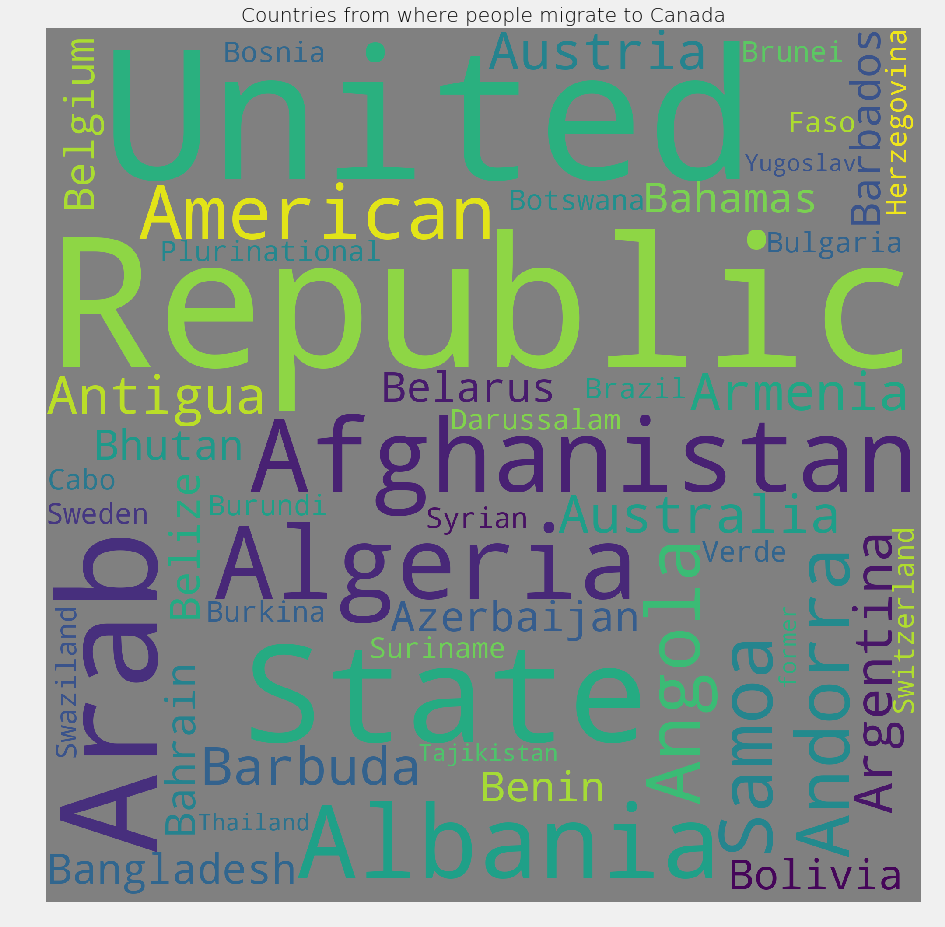

In [6]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'gray',
              width = 2000,
              height = 2000,
              max_words = 50).generate(str(data['OdName']))
plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Countries from where people migrate to Canada', fontsize = 20, fontweight = 100)
plt.imshow(wc)
plt.axis('off')
plt.show()

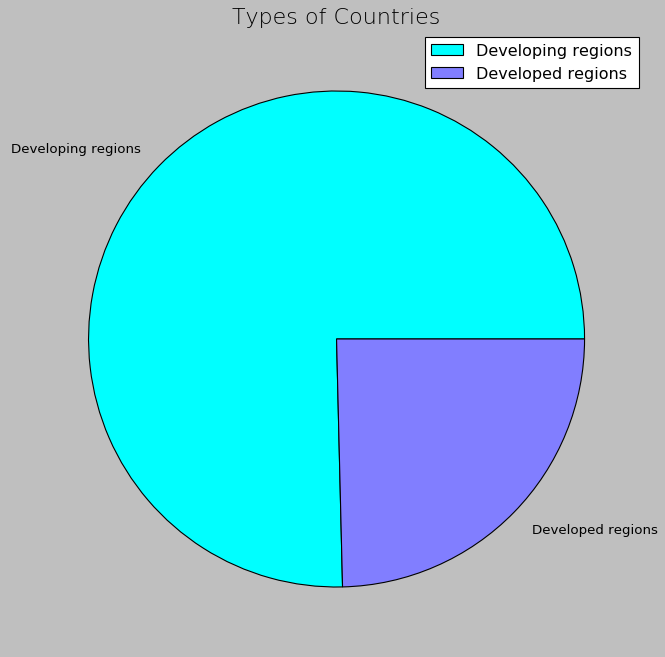

In [7]:

plt.style.use('_classic_test')

colors = plt.cm.cool(np.linspace(0, 50, 100))
data['DevName'].value_counts().plot.pie(colors = colors,
                                       figsize = (10, 10))

plt.title('Types of Countries', fontsize = 20, fontweight = 30)
plt.axis('off')
plt.legend()
plt.show()

## Data Cleaning

In [8]:
# data cleaning

# let's remove the columns which are not required
data = data.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1)

# adding a Total column to add more information
data['Total'] = data.sum(axis = 1)

# let's check the head of the cleaned data
data.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [9]:
# download countries geojson file

# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [10]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

## Immigration to Canada

In [11]:
import warnings
warnings.filterwarnings('ignore')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['OdName', 'Total'],
    key_on='feature.properties.name',
    fill_color='Greens', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

**Thanks for Reading the kernel, please upvote the kernel if you like it.**